In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
od.download("https://www.kaggle.com/datasets/yasserh/uber-fares-dataset")

Skipping, found downloaded files in ".\uber-fares-dataset" (use force=True to force download)


In [3]:
target_folder = 'uber-fares-dataset/'

In [4]:
os.listdir(target_folder)[0]

'uber.csv'

In [5]:
target_file = target_folder + '/' + os.listdir(target_folder)[0]

In [6]:
df_fares = pd.read_csv(target_file)

# Clean and preprocess dataset

In [7]:
df_fares.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [8]:
df_fares.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [9]:
df_fares.drop(['key','Unnamed: 0'], axis=1, inplace=True)

In [10]:
df_fares.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [11]:
df_fares.dropna(inplace=True)
df_fares.reset_index(drop=True)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199994,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199995,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199996,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199997,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [12]:
df_fares.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df_fares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_datetime    199999 non-null  object 
 2   pickup_longitude   199999 non-null  float64
 3   pickup_latitude    199999 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 12.2+ MB


In [14]:
df_fares['datetime'] = pd.to_datetime(df_fares['pickup_datetime'], utc=True)

df_fares['weekday'] = df_fares['datetime'].dt.weekday
df_fares['month'] = df_fares['datetime'].dt.month
df_fares['year'] = df_fares['datetime'].dt.year
df_fares['hour'] = df_fares['datetime'].dt.hour
df_fares['minute'] = df_fares['datetime'].dt.minute

df_fares.drop(['pickup_datetime','datetime'], axis=1, inplace=True)
df_fares.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,month,year,hour,minute
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,5,2015,19,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,7,2009,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,8,2009,21,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,6,2009,8,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,8,2014,17,47


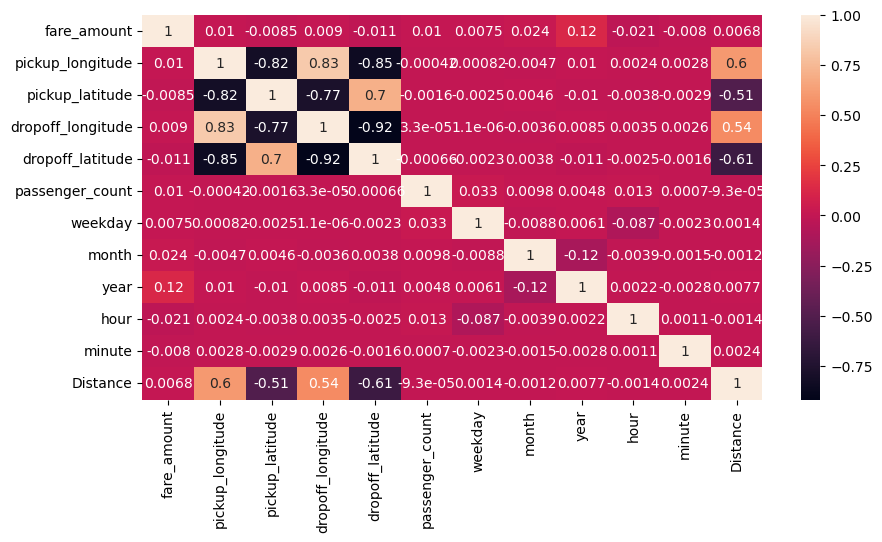

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_fares.corr(), annot=True)
plt.show()

# Train test split and feature scalling

In [36]:
X = df_fares.drop(['fare_amount','Distance'],axis=1)
y = df_fares['fare_amount']

In [37]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [38]:
scaler  = StandardScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training and evaluation

In [40]:
clf = RandomForestRegressor().fit(X_train, y_train)

In [41]:
y_pred = clf.predict(X_test)

In [42]:
mae = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae, r2)

20.811651049480265 0.7901658444987871


In [34]:
pd.DataFrame({'Y true':y_test,'Y pred':y_pred})

,Y true,Y pred
153520,12.0,12.8350
27355,12.1,9.4055
131588,6.5,9.0650
55532,6.9,7.4880
117268,4.5,5.7650
...,...,...
104460,4.0,5.3350
166374,20.5,20.5950
183205,7.5,7.7400
20382,4.0,5.8700
